In [92]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
#df = pd.read_csv('scATAC_TF_ctrlTx_var.csv')

df = pd.read_csv(open('scATAC_TF_ctrlTx_var.csv','rU'), encoding='utf-8', engine='c')
df.head()
#df.groupby(['TF','condition']).count()

,TF,Dev,condition
0,'YY1-MA0095.2',2.2185,erl
1,'TLX1-NFIC-MA0119.1',1.8080,erl
2,'EHF-MA0598.1',1.7852,erl
3,'Rxra-MA0512.1',1.6633,erl
4,'RXR-RAR_DR5-MA0159.1',1.6278,erl


In [3]:
newTF = [str(i).strip().split(':m')[0].replace("'", "") for i in df['TF']]
df['TF'] = newTF


In [4]:
df.head()

,TF,Dev,condition
0,YY1-MA0095.2,2.2185,erl
1,TLX1-NFIC-MA0119.1,1.8080,erl
2,EHF-MA0598.1,1.7852,erl
3,Rxra-MA0512.1,1.6633,erl
4,RXR-RAR_DR5-MA0159.1,1.6278,erl


In [6]:
#shrTF.head()

In [7]:
sTF = df.groupby('TF').count()
sTF = [str(i) for i in sTF[sTF.condition>1].index]

In [8]:
s = [i for i in set(sTF).intersection(df['TF'])]

In [9]:
#df[df.TF=='Foxq1-MA0040.1']
shrTF = df[df['TF'].isin(s)]

In [71]:
#shrTF.groupby('TF').count()

In [69]:
#plt.plot(shrTF)
#shrTF[shrTF.condition=='ctrl']

#shrTF[shrTF.condition=='ctrl']['Dev']
shrTF.head()
#plt.scatter(x=shrTF[shrTF.condition=='ctrl']['Dev'],y=shrTF[shrTF.condition=='erl']['Dev'])
#plt.show()

,TF,Dev,condition
0,YY1-MA0095.2,2.2185,erl
1,TLX1-NFIC-MA0119.1,1.8080,erl
2,EHF-MA0598.1,1.7852,erl
3,Rxra-MA0512.1,1.6633,erl
5,USF1-MA0093.2,1.6104,erl


In [41]:
c = shrTF[shrTF.condition=='ctrl']; c = c.sort('TF'); c = c.reset_index()
e = shrTF[shrTF.condition=='erl']; e = e.sort('TF'); e = e.reset_index()

In [48]:
c = c.sort('Dev',ascending=False)

In [66]:
cIdx = [i for i in c.index]
e = e.loc[cIdx]


In [76]:
c.columns=['oldIdx','TF','ctrl','junk']
e.columns=['oldIdx','TF','erl','junk']

In [77]:
c['erl']=e['erl']

In [81]:
c = c.drop('junk',1)

In [117]:
rVal = str(round(stats.pearsonr(c['ctrl'],c['erl'])[0],3))
pVal = str(round(stats.pearsonr(c['ctrl'],c['erl'])[1],3))

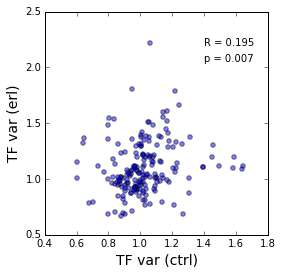

In [128]:
fig=plt.figure(figsize=(4,4),dpi=1600)
ax=plt.subplot(111)

plt.scatter(x = c['ctrl'],y=c['erl'],alpha=0.5)
ax.text(1.4,2.2,'R = '+rVal)
ax.text(1.4,2.05,'p = '+pVal)
ax.set_xlabel('TF var (ctrl)',fontsize=14)
ax.set_ylabel('TF var (erl)',fontsize=14)
plt.show()
fig.savefig('scATAC_TF_corr',dpi=1600,bbox_inches='tight')
